In [27]:
from dataset_analysis import *
from XMLAnnotParser import parse_single_annotation_file

# Test

In [28]:
annotations_top_dir = './annotation'
# dataset_dict_list = get_all_dicts(annotations_top_dir)

In [29]:
annotation_path = './annotation/h30_5_10/DJI_0002.xml'

In [30]:
xml_dict = parse_single_annotation_file(xml_path=annotation_path)

In [31]:
xml_dict

{'annotations_count': '19',
 'tracks_list': [{'id': '0',
   'label': 'person',
   'box_list': [{'frame': '0',
     'xtl': '137',
     'ytl': '26',
     'xbr': '153',
     'ybr': '65',
     'outside': '0',
     'occluded': '0',
     'attributes_dict': {'altitude': '30m',
      'illumination': 'bright_light',
      'keep_out': 'not_keep_out',
      'cam_movement': 'not_shake',
      'scene': 'stadium'}},
    {'frame': '1',
     'xtl': '137',
     'ytl': '28',
     'xbr': '153',
     'ybr': '67',
     'outside': '0',
     'occluded': '0',
     'attributes_dict': {'altitude': '30m',
      'illumination': 'bright_light',
      'keep_out': 'not_keep_out',
      'cam_movement': 'not_shake',
      'scene': 'stadium'}},
    {'frame': '2',
     'xtl': '137',
     'ytl': '30',
     'xbr': '153',
     'ybr': '69',
     'outside': '0',
     'occluded': '0',
     'attributes_dict': {'altitude': '30m',
      'illumination': 'bright_light',
      'keep_out': 'not_keep_out',
      'cam_movement': 'not_

# Statistics

In [32]:
total_video_sequences = count_sequences(annotations_top_dir)

total_category_distribution_frame_level_dict = {}

total_outside_distribution_frame_level_dict = {}
total_occlusion_distribution_frame_level_dict = {}

total_altitude_distribution_frame_level_dict = {}
total_illumination_distribution_frame_level_dict = {}
total_keep_out_distribution_frame_level_dict = {}
total_cam_movement_distribution_frame_level_dict = {}
total_scene_distribution_frame_level_dict = {}

In [33]:
annotations_top_dir = './annotation'

In [52]:
for count, (xml_dict, xml_path) in enumerate(annotations_dict_generator(annotations_top_dir)):
    # if count >= 30:
    #     break # for debug only
    try:
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        total_category_distribution_frame_level_dict = merge_dicts(
            total_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, keep_out_distribution_frame_level_dict, cam_movement_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    total_outside_distribution_frame_level_dict = merge_dicts(total_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    total_occlusion_distribution_frame_level_dict = merge_dicts(total_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    total_altitude_distribution_frame_level_dict = merge_dicts(total_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    total_illumination_distribution_frame_level_dict = merge_dicts(total_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    total_keep_out_distribution_frame_level_dict = merge_dicts(total_keep_out_distribution_frame_level_dict,
                                                               keep_out_distribution_frame_level_dict)
    total_cam_movement_distribution_frame_level_dict = merge_dicts(total_cam_movement_distribution_frame_level_dict,
                                                                   cam_movement_distribution_frame_level_dict)
    total_scene_distribution_frame_level_dict = merge_dicts(total_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

annotation files iterator progress: : 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]


In [35]:
total_video_sequences

120

In [36]:
total_category_distribution_frame_level_dict

{'person': 1483758, 'cycle': 127341, 'car': 1808538}

In [37]:
total_altitude_distribution_frame_level_dict

{'120m': 506301, '30m': 350910, '60m': 798428, '90m': 409944}

In [38]:
total_illumination_distribution_frame_level_dict

{'bright_light': 2062900, 'weak_light': 2683}

In [39]:
total_occlusion_distribution_frame_level_dict

{'0': 3294584, '1': 56328}

In [40]:
total_outside_distribution_frame_level_dict

{'0': 694424, '1': 2656488}

In [41]:
total_keep_out_distribution_frame_level_dict

{'not_keep_out': 1930474, 'keep_out': 135109}

In [42]:
total_cam_movement_distribution_frame_level_dict

{'not_shake': 2058660, 'shake': 6923}

In [43]:
total_scene_distribution_frame_level_dict

{'street': 1726051, 'stadium': 339532}

In [44]:
count_error_files(annotations_top_dir)

45

# Visualize Results

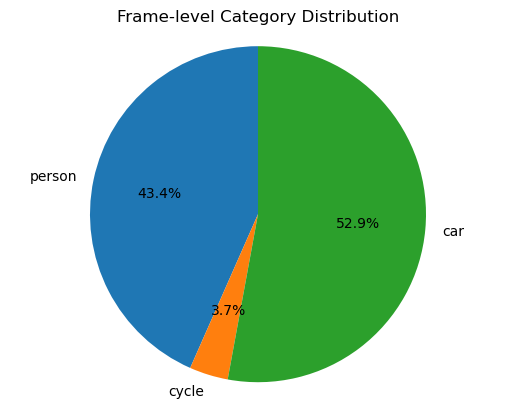

In [45]:
draw_pie_chart(total_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

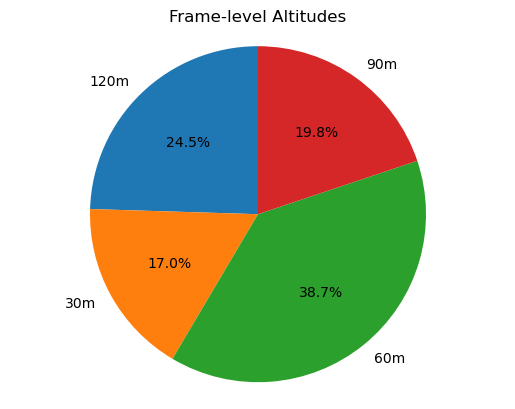

In [46]:
draw_pie_chart(total_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

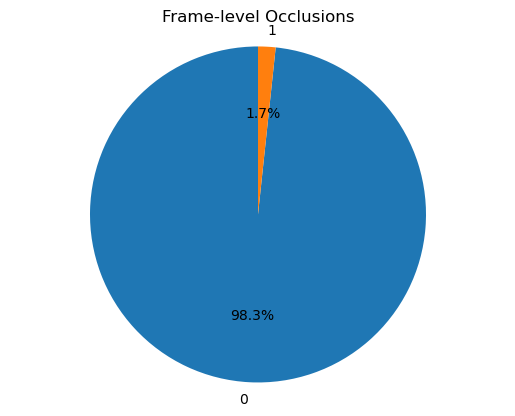

In [47]:
draw_pie_chart(total_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

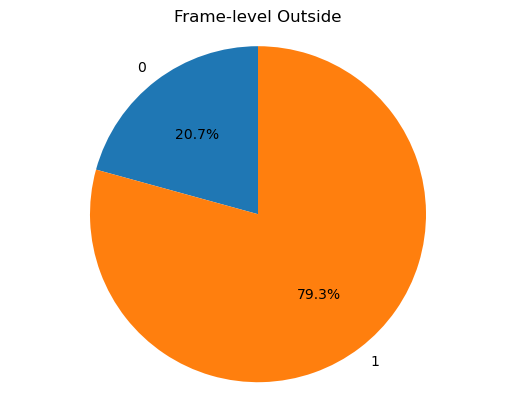

In [48]:
draw_pie_chart(total_outside_distribution_frame_level_dict, title="Frame-level Outside")

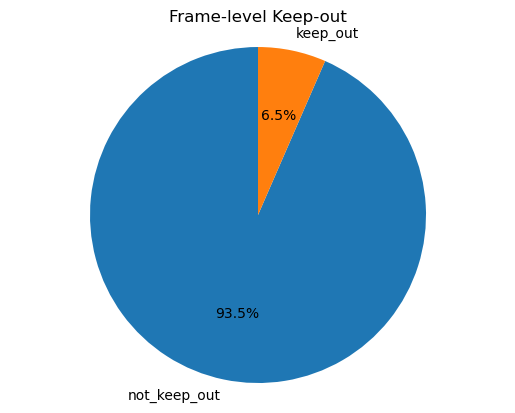

In [49]:
draw_pie_chart(total_keep_out_distribution_frame_level_dict, title="Frame-level Keep-out")

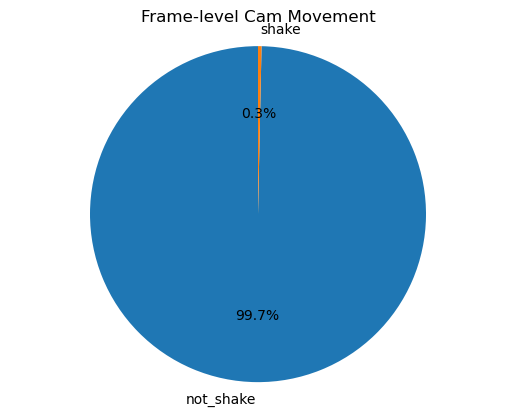

In [50]:
draw_pie_chart(total_cam_movement_distribution_frame_level_dict, title="Frame-level Cam Movement")

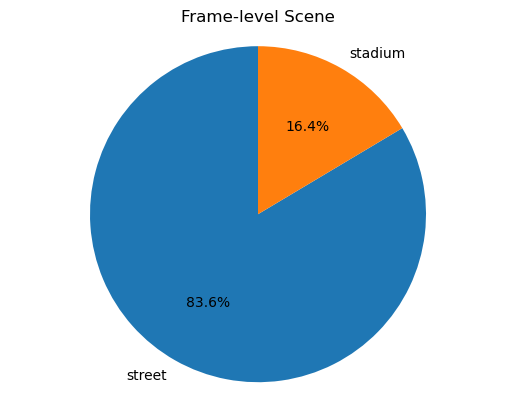

In [51]:
draw_pie_chart(total_scene_distribution_frame_level_dict, title="Frame-level Scene")